# Final visualizations for the dissertations

## Objective

## Steps

## 1. File with information about ICO

In [2]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import plotly.graph_objects as go


In [3]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=';')

In [4]:
df_info.head()

,ico,adress,fraud,start_date,market_start_date,diff_days,market_days,size_ok,price_zero,Market Cap,o_concur,biggest_holder,exchange,contract,date_analysis,code,site,social_media
0,0X,0xe41d2489571d322189246dafa5ebde1f4699f498,0,08/11/2017,15/08/2017,4,1140,NaN,NaN,45.0,x,2,6,14,02/11/2018,NaN,NaN,NaN
1,AELF,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0,18/12/2017,21/12/2017,3,1012,NaN,NaN,154.0,x,13,10,0,19/06/2018,NaN,NaN,NaN
2,AMPLEFORTH,0xd46ba6d942050d489dbd938a2c909a5d5039a161,0,14/06/2019,27/06/2019,13,459,NaN,NaN,47.0,x,3,4,20,24/12/2019,NaN,NaN,NaN
3,ANKR,0x8290333cef9e6d528dd5618fb97a76f268f3edd4,0,21/02/2019,03/05/2019,12,573,NaN,NaN,170.0,x,11,7,41,09/01/2019,NaN,NaN,NaN
4,BANCOR,0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c,0,06/10/2017,06/12/2017,2,1204,NaN,NaN,61.0,x,2,11,7,12/09/2017,NaN,NaN,NaN


## 3. Load data from .py file
For each key inside the dictionary, the arrays correspond to the following series:

0. array_daily_transactions
1. array_perc_new_holders
2. array_biggest_holder
3. array_newbiers
4. array_gas_ratio


In [5]:
from dict_ico_array_length_20 import dict_ico_len_20

## 3. Load data from .py file
For each key inside the dictionary, the arrays correspond to the following series:

0. array_daily_transactions
1. array_perc_new_holders
2. array_biggest_holder
3. array_newbiers
4. array_gas_ratio


## 4. Filter data for size equals to 20

In [6]:
dict_perc_transactions_20 = {k:v[0] for k,v in dict_ico_len_20.items() if len(v[0]) == 20}
dict_perc_new_holders_20 = {k:v[1] for k,v in dict_ico_len_20.items() if len(v[1]) == 20}
dict_perc_big_holder_20 = {k:v[2] for k,v in dict_ico_len_20.items() if len(v[2]) == 20}
dict_perc_newbiers_20 = {k:v[3] for k,v in dict_ico_len_20.items() if len(v[3]) == 20}
dict_gas_ratio = {k:v[4] for k,v in dict_ico_len_20.items() if len(v[4]) == 20}

In [7]:
df_transactions_20 = pd.DataFrame(dict_perc_transactions_20).T
df_new_holders_20 = pd.DataFrame(dict_perc_new_holders_20).T
df_big_holder_20 = pd.DataFrame(dict_perc_big_holder_20).T
df_newbiers_20 = pd.DataFrame(dict_perc_newbiers_20).T
df_gasratio_20 = pd.DataFrame(dict_gas_ratio).T

In [8]:
print(df_transactions_20.shape)
print(df_new_holders_20.shape)
print(df_big_holder_20.shape)
print(df_newbiers_20.shape)
print(df_gasratio_20.shape)

(222, 20)
(233, 20)
(233, 20)
(234, 20)
(219, 20)


## 5. Plotting the dataset

In [29]:
import plotly.express as px

def plot_series(df_series, df_ico_info):
    df_labeled = df_series.merge(df_ico_info[['ico', 'fraud']], left_index=True, right_on='ico')
    df_labeled.set_index('ico', inplace=True)
    df_series.loc['fraud_mean'] = df_labeled[df_labeled.fraud == 1].iloc[:, :].mean(axis=0)
    df_series.loc['success_mean'] = df_labeled[df_labeled.fraud == 0].iloc[:, :].mean(axis=0)
    df_series_t = df_series.T
    df_series_t.head()
    df_series_t.index = df_series_t.index + 1

    fraud_dict = {1: 'fraud', 0:'success'}
    color_dict = {1: 'rgba(152, 0, 0, .1)', 0: 'rgba(0,0,255,.1)'}

    fig = go.Figure()
    for ico in df_series_t.columns[:-2]:
        is_fraud = df_ico_info.loc[df_ico_info.ico ==ico]['fraud'].values[0]
        fig.add_trace(go.Scatter(x=df_series_t.index.values, y=df_series_t[ico], #opacity=0.2,
                                showlegend=False,
                                legendgroup = fraud_dict.get(is_fraud),
                                marker_color=color_dict.get(is_fraud)))
    fig.add_trace(go.Scatter(x=df_series_t.index.values, y=df_series_t['fraud_mean'], #opacity=0.2,
                                name='fraud_mean',
                                legendgroup ='fraud',
                                marker_color='rgba(152, 0, 0, 1.)',
                             showlegend=True             
                 ))

    fig.add_trace(go.Scatter(x=df_series_t.index.values, y=df_series_t['success_mean'], #opacity=0.2,
                                name='success_mean',
                                legendgroup ='success',
                                marker_color='rgba(0,0,255,1.0)',
                             showlegend=True             
                 ))

    fig.show()
    

### Transactions

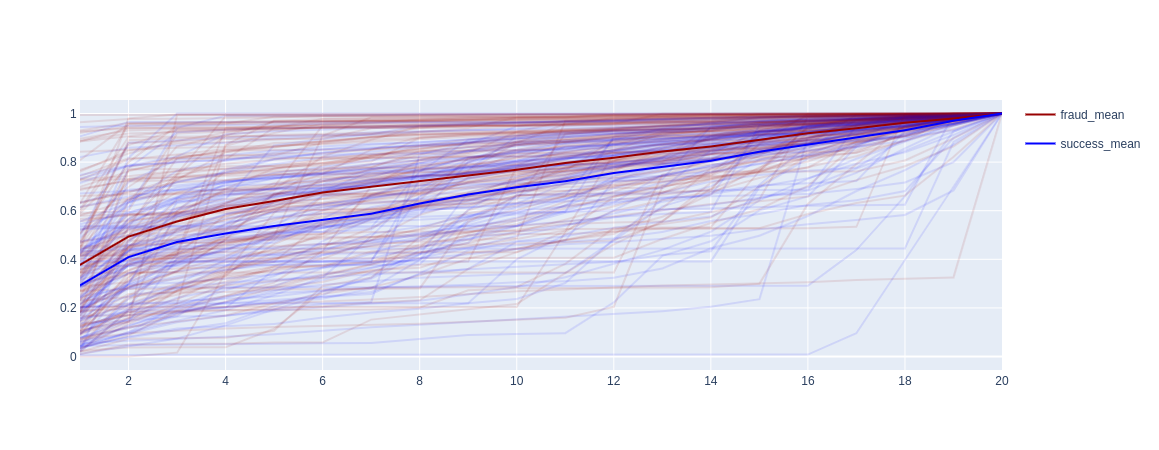

In [30]:
plot_series(df_transactions_20, df_info)

### New holders

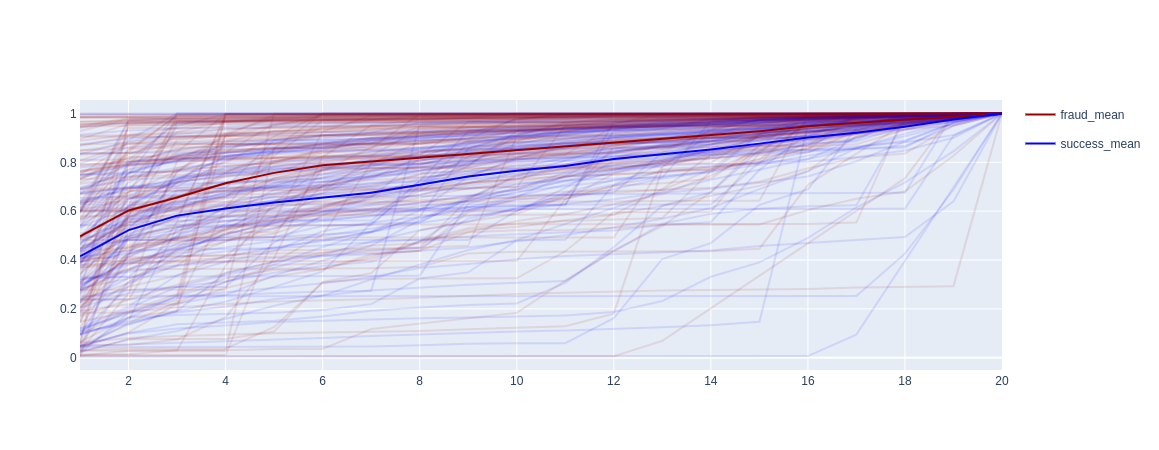

In [31]:
plot_series(df_new_holders_20, df_info)

### Biggest holders

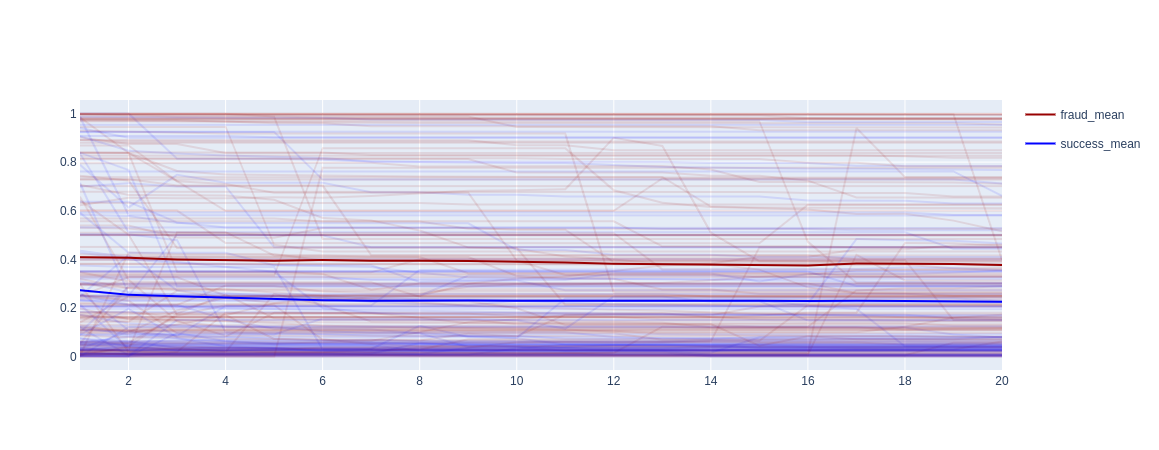

In [32]:
plot_series(df_big_holder_20, df_info)

### New biers

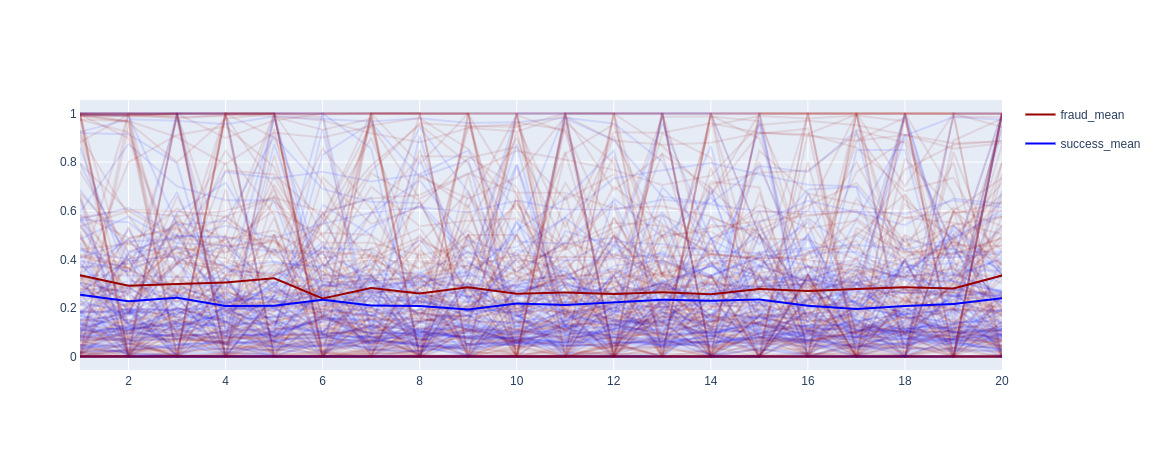

In [33]:
plot_series(df_newbiers_20, df_info)

### Gas Ratio

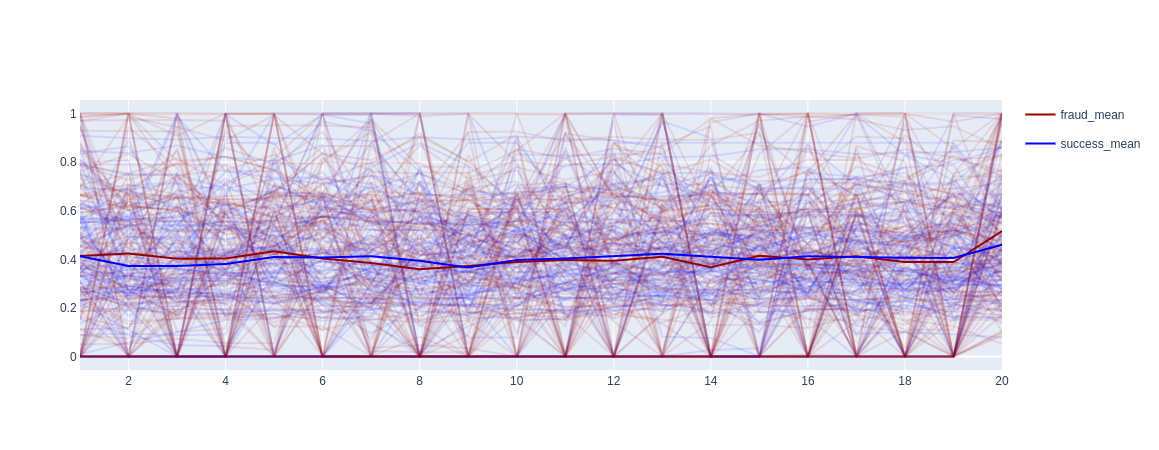

In [34]:
plot_series(df_gasratio_20, df_info)